In [42]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [72]:
# cat photos
cat_photos_path = "./Cat"
cat_photos = os.listdir(cat_photos_path)
#  dog photos
dog_photos_path = "./Dog"
dog_photos = os.listdir(dog_photos_path)
print(len(cat_photos))
print(len(dog_photos))

1000
1001


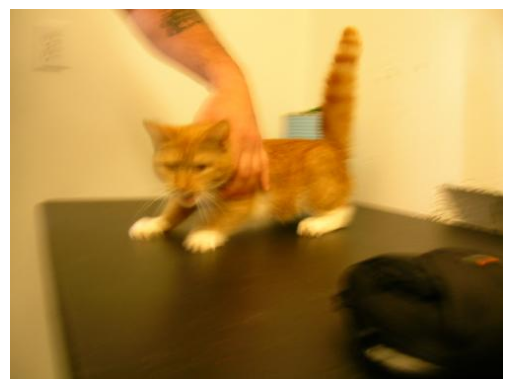

In [38]:
image = plt.imread(os.path.join(cat_photos_path, cat_photos[0]))

plt.imshow(image)
plt.axis("off")
plt.show()

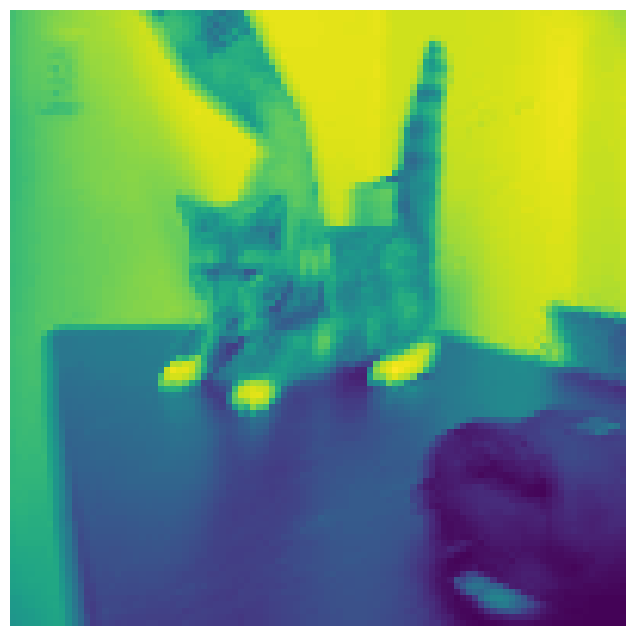

(100, 100)


In [28]:
img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
img_resize = cv2.resize(img_gray, None, fx=100/image.shape[1], fy=100/image.shape[0])
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()
print(img_resize.shape)


In [57]:
img_resize.reshape(10000, 1)

array([[168],
       [173],
       [178],
       ...,
       [  1],
       [  1],
       [  1]], dtype=uint8)

In [67]:
cat_images = [plt.imread(os.path.join(cat_photos_path, photo_path)) for photo_path in cat_photos]


In [73]:
dog_images = [plt.imread(os.path.join(dog_photos_path, photo_path)) for photo_path in dog_photos]


In [111]:
def img_preprocessing(images):
    reshaped_images = []
    for img in images:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        resized_img = cv2.resize(gray_img, None, fx=150/gray_img.shape[1], 
                                 fy=150/gray_img.shape[0])
        reshape_img = resized_img.reshape(22500, 1)
        reshaped_images.append(reshape_img)
    return reshaped_images

In [112]:
cat_images_preprocessed = img_preprocessing(cat_images)

In [113]:
cat_images_preprocessed[12].shape

(22500, 1)

In [114]:
dog_images_preprocessed = img_preprocessing(dog_images)

In [115]:
X = np.array(cat_images_preprocessed + dog_images_preprocessed)
y = np.array([0] * len(cat_images_preprocessed) + [1] * len(dog_images_preprocessed))

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

In [118]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Trenowanie modelu SVM
clf = SVC(kernel="rbf")
clf.fit(X_train.reshape(len(X_train), -1), y_train)  # Spłaszczamy dane do 2D

# Predykcja
y_pred = clf.predict(X_test.reshape(len(X_test), -1))

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność modelu: {accuracy:.2f}")


Dokładność modelu: 0.60


In [119]:
from sklearn.ensemble import RandomForestClassifier

# Tworzenie i trenowanie modelu
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = clf.predict(X_test)

# Sprawdzenie dokładności
accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność modelu: {accuracy:.2f}")


Dokładność modelu: 0.63
